In [91]:
from analyse_helper import load_ocelot_data
import numpy as np
import matplotlib.pyplot as plt
import json
import glob
from scipy.stats import gaussian_kde, norm

In [156]:
 # IPAC PLOT SIZES
TEXTWIDTH = 483.69684
LINEWIDTH = 214.7352
#pt_to_inches = 1/72.27
fig_width_pt = TEXTWIDTH
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

 
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
#plt.rc('xtick', labelsize=8)
#plt.rc('ytick', labelsize=8)
#plt.rc('axes', labelsize=8)

params = {'axes.titlesize': 8,
          'axes.labelsize': 8,
          'legend.fontsize': 8,
          'xtick.labelsize': 6,
          'ytick.labelsize': 6,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

## Look into signal noise

In [40]:
base_dir = "../2022-11-24-data/bo/"
# flists = glob.glob(base_dir+"benchmark_*.json")
flists = glob.glob(base_dir+"*.json")

In [81]:
Y = []
Y_std = []
for file in flists:
    with open(file) as f:
        data = json.load(f)
        if data["metadata"]["nreadings"] == 30:
            Y = Y + data["Y"]
            Y_std = Y_std + data["Y_std"]
Y = np.array(Y)
Y_std = np.array(Y_std)
# Filter energy
idx_highenergy = np.argwhere(Y>50)
Y = Y[idx_highenergy].flatten()
Y_std = Y_std[idx_highenergy].flatten()
print(len(Y))

1710


In [82]:
H, xedges, yedges = np.histogram2d(Y_std, Y, bins=(50, 50))
H = H.T

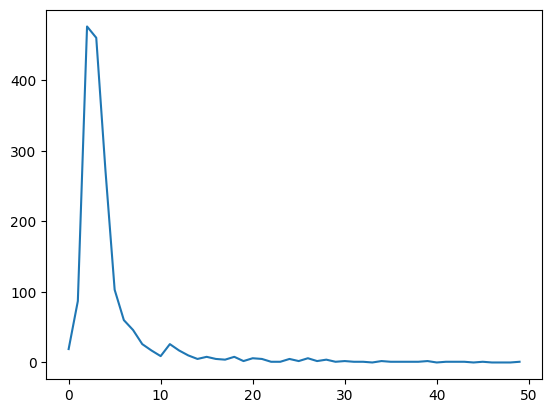

In [84]:
plt.plot(H.sum(axis=0))

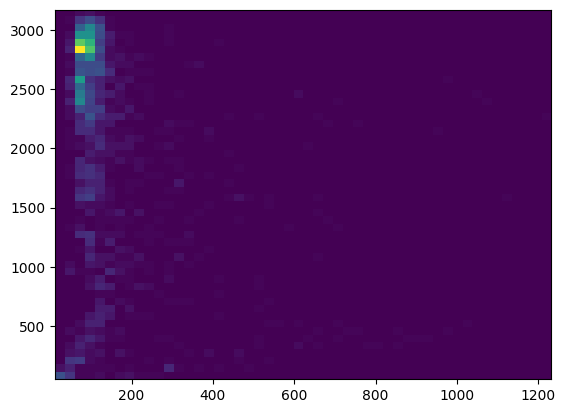

In [85]:
plt.imshow(H, interpolation="nearest", aspect='auto', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], )

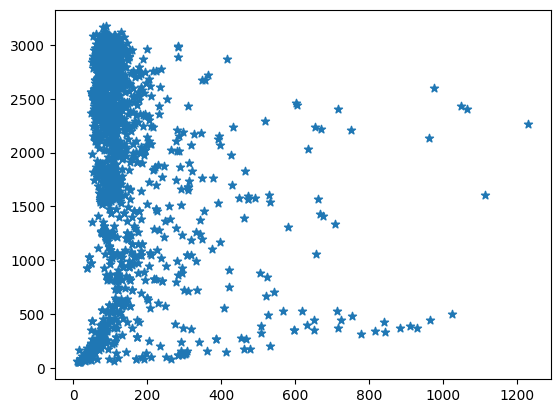

In [86]:
# normal scatter plot
plt.scatter(Y_std,Y, marker="*")

(0, 1)


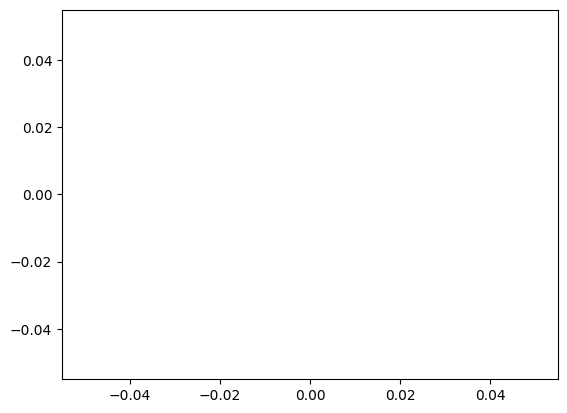

In [87]:
# low-energy points:
idx_lowenergy = np.argwhere(Y<30)
print(Y_std[idx_lowenergy].shape)
plt.scatter(Y_std[idx_lowenergy], Y[idx_lowenergy])

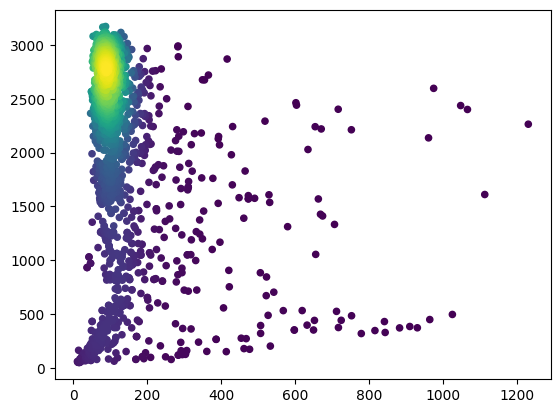

In [90]:
# Calculate the point density
xy = np.vstack([Y_std,Y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
# idx
x, y, z = Y_std[idx], Y[idx], z[idx]
plt.scatter(x, y, c=z, s=20)

### Setup the plot

In [124]:
nbins = 50
xmin, xmax = 0, 800
xbin_size = (xmax - xmin) / nbins
H, xedges, yedges = np.histogram2d(Y_std, Y, bins=(nbins, nbins), range=([[xmin,xmax],[50,3000]]))
H = H.T

In [129]:
mu, std = np.mean(Y_std[np.argwhere(Y_std<xmax)]), np.std(Y_std[np.argwhere(Y_std<xmax)])
print(mu, std)
pdf_x = np.linspace(xmin,xmax,100)
pdf_y = 1.0/np.sqrt(2*np.pi*std**2)*np.exp(-0.5*((pdf_x-mu)/std)**2)

126.69968105392422 100.34658272921708


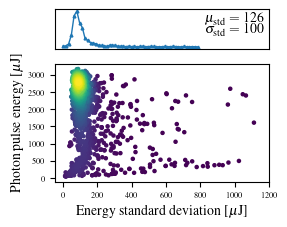

In [174]:
fig, axes = plt.subplots(2,1,gridspec_kw={"height_ratios":[1,3]}, figsize=(LINEWIDTH*inches_per_pt,LINEWIDTH*inches_per_pt*0.8))
axes[0].plot(xedges[:-1], H.sum(axis=0), ls="-",lw=1, marker="^", markersize=2)
axes[0].text(x=0.7,y=0.7,s=r"$\mu_{\mathrm{std}} = " + f"{int(mu)}$", transform=axes[0].transAxes)
axes[0].text(x=0.7,y=0.4,s=r"$\sigma_{\mathrm{std}} = " + f"{int(std)}$", transform=axes[0].transAxes)
#axes[0].plot(pdf_x,pdf_y*len(Y_std))
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].scatter(x, y, c=z, s=5)
for ax in axes:
    ax.set_xlim(-50,1200)
axes[1].set_ylabel(r"Photon pulse energy [$\mu{}$J]")
axes[1].set_xlabel(r"Energy standard deviation [$\mu{}$J]")

fig.tight_layout()
# fig.savefig("../plots/signal_noise.pdf", bbox_inches="tight")

In [157]:
# plt.hist2d(Y_std, Y, (50, 50), cmap=plt.cm.jet, cmin=1)